# 3.1 - Evaluación

### Silhoutte Score

$$S=\frac{b(v)-a(v)}{max(a,b)}$$

donde:

+ v:= vector de datos
+ a(v):=distancia media desde v al resto de vectores del mismo cluster
+ b(v):=distancia media desde v a los vectores del cluster más cercano



S pertenece al intervalo [-1,1], de tal manera que:

+ S=1  => buena clusterizacion
+ S=0  => overlapping
+ S=-1 => mala clusterizacion

In [1]:
from sklearn import cluster, datasets

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D


import numpy as np

In [2]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)

In [3]:
X=StandardScaler().fit_transform(X)

In [4]:
single=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
single.fit(X)

y1_pred=single.labels_

In [7]:
kmeans=cluster.KMeans(n_clusters=2)
kmeans.fit(X)

y2_pred=kmeans.predict(X)

**plots**

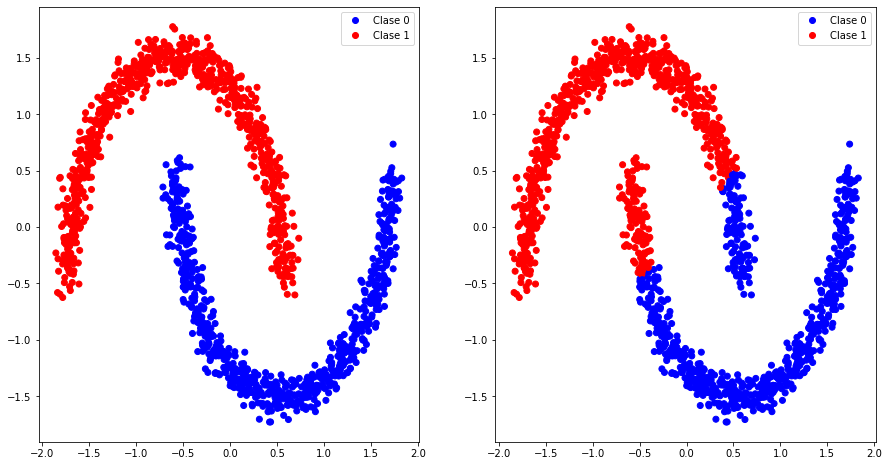

In [8]:
fig,ax = plt.subplots(1, 2, figsize=(15, 8))

colors=np.array(['blue', 'red'])

legend_e=[Line2D([0],[0], color=c, marker='o', linestyle='',
                 label='Clase {}'.format(i))  for i,c in enumerate(colors)]

ax[0].scatter(X[:,0], X[:, 1], color=colors[y1_pred])  # es el jerarquico
ax[0].legend(handles=legend_e, loc='upper right')

ax[1].scatter(X[:,0], X[:, 1], color=colors[y2_pred]) # es el kmeans (por distancia)
ax[1].legend(handles=legend_e, loc='upper right');

In [9]:
from sklearn.metrics import silhouette_score

In [10]:
print(f'Jerarquico: S_SCore = {silhouette_score(X, y1_pred)}')
print(f'KMEANS: S_SCore = {silhouette_score(X, y2_pred)}')

Jerarquico: S_SCore = 0.39168190406011716
KMEANS: S_SCore = 0.4979203808674292


# Elbow

**nº óptimo de clusters**


![elbow](images/elbow.png)

$$WSS=Inercia=\sum_{i=0}^{n} min(|x_i - \bar{x}|^{2})$$

In [17]:
X, y=datasets.make_blobs(n_features=3, centers=2)

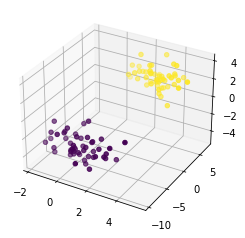

In [18]:
fig=plt.figure()

ax=fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c=y);

In [25]:
inercia=[cluster.KMeans(n_clusters=x).fit(X).inertia_ for x in range(1, 10)]

n_clusters=[x for x in range(1, 10)]

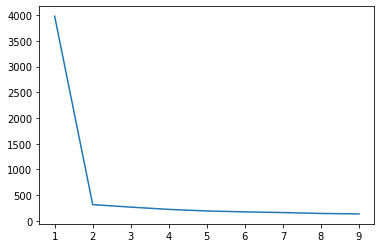

In [27]:
fig=plt.figure()

ax=fig.add_subplot()
ax.plot(n_clusters, inercia);

In [28]:
from yellowbrick.cluster import KElbowVisualizer

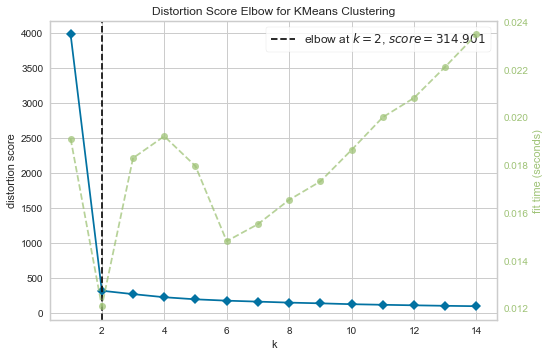

In [29]:
modelo=cluster.KMeans()

visual=KElbowVisualizer(modelo, k=(1, 15))
visual.fit(X)

visual.poof();

In [30]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)
X=StandardScaler().fit_transform(X)

In [31]:
inercias=[]

for i in range(1, 10):
    kmeans=cluster.KMeans(n_clusters=i).fit(X)
    
    inercias.append(kmeans.inertia_)

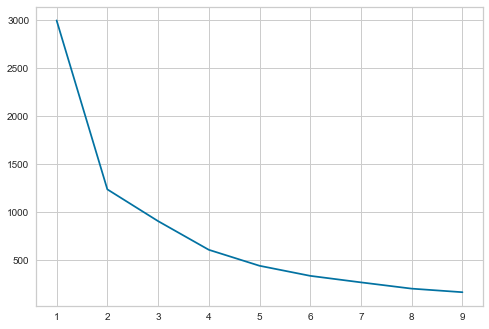

In [32]:
plt.plot(range(1, 10), inercias);

# Rand Score

$$R=\frac{(a+b)}{(a+b+c+d)}$$


pertece al intervalo [0,1]

Sea  S={ s_1, $\ldots{}$, s_n }; X={ x_1, $\ldots{}$, x_n } partición de S e Y={ y_1, $\ldots{}$, y_n } partición de S, entonces:

+ a:=nº de pares de elementos en S que están en el mismo subconjunto de X e Y
+ b:=nº de pares de elementos en S que están en diferentes subconjuntos de X e Y
+ c:=nº de pares de elementos en S que están en el mismo subconjunto de X y en diferente subconjunto de Y
+ d:=nº de pares de elementos en S que están en diferente subconjunto de X y en el mismo subconjunto de Y



Intuitivamente, _a+b_ es la correspondencia entre X e Y, c+d es la discordancia.


https://es.wikipedia.org/wiki/Partici%C3%B3n_de_un_conjunto

http://i3campus.co/CONTENIDOS/wikipedia/content/a/partici%25c3%25b3n_(matem%25c3%25a1tica).html#:~:text=En%20matem%C3%A1ticas%2C%20una%20partici%C3%B3n%20de,en%20subconjuntos%20disjuntos%20no%20vac%C3%ADos.

**Adjusted Rand Score**


$$AR=\frac{R - ExpectedR}{max(R) - ExpectedR}$$

In [33]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)
X=StandardScaler().fit_transform(X)

In [34]:
single=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
single.fit(X)

y1_pred=single.labels_

In [35]:
kmeans=cluster.KMeans(n_clusters=2)
kmeans.fit(X)

y2_pred=kmeans.predict(X)

In [36]:
from sklearn.metrics import adjusted_rand_score as ars

In [37]:
ars(y, y1_pred)  # jerarquico, clusterizacion perfecta

1.0

In [38]:
ars(y, y2_pred)  # kmeans

0.4896595612028019

# Visualización de Clusters

In [39]:
X, _ = datasets.make_blobs(n_samples=1500, centers=4, cluster_std=1.5)

In [41]:
kmeans=cluster.KMeans(n_clusters=4).fit(X)

In [43]:
y_pred=kmeans.predict(X)

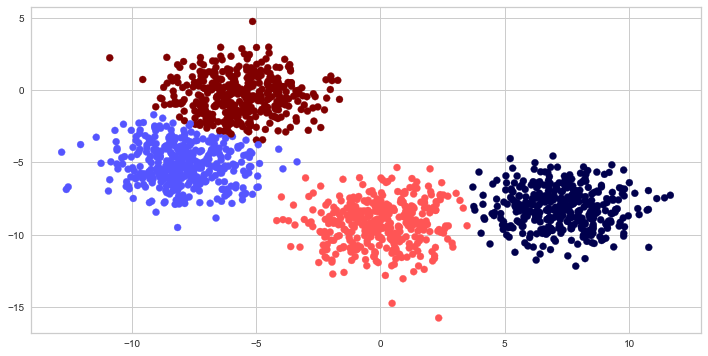

In [51]:
plt.figure(figsize=(12, 6))

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='seismic_r');

In [52]:
centros=kmeans.cluster_centers_

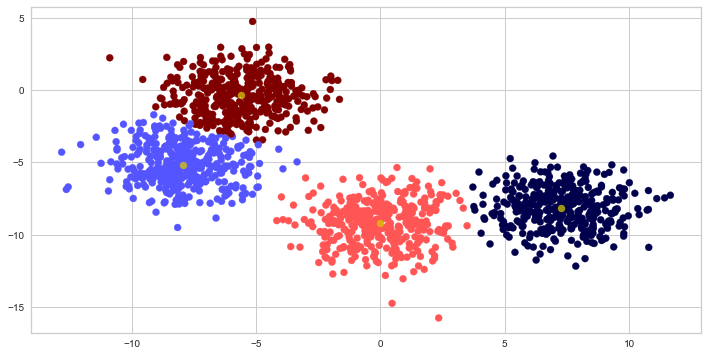

In [54]:
plt.figure(figsize=(12, 6))

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='seismic_r')
plt.scatter(centros[:, 0], centros[:, 1], c='y', s=50, alpha=0.75);

**otro plot en 3D**

**reduccion de dimensiones-viz**

**t-SNE**

**UMAP - MNIST**

**umap supervisado**

**umap en moons y en blobs**